In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import env
import wrangle_zillow
from zillow_query import query as zquery
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy import stats

In [3]:
# get my mall 
df = wrangle_zillow.acquire_zillow()
df.shape

(52319, 68)

In [4]:
df.describe()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror,buildingclassdesc
count,5.231900e+04,5.231900e+04,13615.000000,70.00000,47.000000,52319.000000,52319.000000,0.0,33654.000000,52184.000000,...,81.0,5.223700e+04,5.231800e+04,52319.0,5.231800e+04,52315.000000,2068.000000,5.219800e+04,52319.000000,0.0
mean,1.496888e+06,1.299682e+07,2.439589,7.10000,678.978723,2.300015,3.300770,NaN,6.264961,2.305276,...,1.0,1.966385e+05,5.298287e+05,2016.0,3.334946e+05,6454.802564,14.101064,6.050245e+13,0.018136,NaN
std,8.594310e+05,3.350951e+06,3.847925,2.66567,711.825226,1.022816,0.947563,NaN,1.716328,1.018076,...,0.0,2.542880e+05,7.518358e+05,0.0,5.705157e+05,8752.550365,2.400399,1.861145e+12,0.176904,NaN
min,3.490000e+02,1.071186e+07,1.000000,2.00000,38.000000,0.000000,0.000000,NaN,1.000000,1.000000,...,1.0,1.290000e+02,1.000000e+03,2016.0,1.610000e+02,49.180000,4.000000,6.037101e+13,-4.655420,NaN
25%,7.575810e+05,1.151017e+07,1.000000,7.00000,263.500000,2.000000,3.000000,NaN,5.000000,2.000000,...,1.0,7.715900e+04,1.940205e+05,2016.0,7.619400e+04,2660.965000,14.000000,6.037401e+13,-0.024702,NaN
50%,1.500095e+06,1.257825e+07,1.000000,7.00000,512.000000,2.000000,3.000000,NaN,6.000000,2.000000,...,1.0,1.319100e+05,3.740080e+05,2016.0,2.180790e+05,4650.620000,15.000000,6.037620e+13,0.006935,NaN
75%,2.241248e+06,1.413036e+07,1.000000,7.00000,809.500000,3.000000,4.000000,NaN,8.000000,3.000000,...,1.0,2.264550e+05,6.193580e+05,2016.0,4.087795e+05,7379.320000,15.000000,6.059042e+13,0.040599,NaN
max,2.982270e+06,1.676878e+08,13.000000,21.00000,3560.000000,18.000000,14.000000,NaN,12.000000,18.000000,...,1.0,9.164901e+06,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,5.262999,NaN


In [13]:
df.censustractandblock.isnull().sum()

121

In [14]:
df = df.dropna(subset=['censustractandblock'])


In [15]:
train, val_test = train_test_split(df, train_size = 0.7,
                                  random_state = 42,
                                  stratify = None)
val, test = train_test_split(val_test, train_size =0.5,
                            random_state = 42,
                            stratify = None)

In [16]:
columns_to_keep = ['bedroomcnt', 'bathroomcnt', 'censustractandblock', 'taxvaluedollarcnt','assessmentyear', 'logerror']

In [17]:
df = df[columns_to_keep]

In [18]:
df

,bedroomcnt,bathroomcnt,censustractandblock,taxvaluedollarcnt,assessmentyear,logerror
0,4.0,3.5,6.059063e+13,1023282.0,2016.0,0.025595
1,2.0,1.0,6.111001e+13,464000.0,2016.0,0.055619
2,3.0,2.0,6.059022e+13,564778.0,2016.0,0.005383
3,4.0,3.0,6.037300e+13,145143.0,2016.0,-0.103410
4,4.0,3.0,6.037461e+13,773303.0,2016.0,-0.001011
...,...,...,...,...,...,...
52314,4.0,2.0,6.037555e+13,346534.0,2016.0,0.001082
52315,2.0,2.0,6.037101e+13,354621.0,2016.0,0.020615
52316,4.0,2.0,6.111008e+13,67205.0,2016.0,0.013209
52317,3.0,1.0,6.037434e+13,49546.0,2016.0,0.037129


### Hypothesis questions


## Does logerror differ across bedroomcnt?

In [19]:
train.bedroomcnt=train.bedroomcnt.fillna(0)

In [20]:
#get data
bedroom = train[train.bedroomcnt !=0]
no_bedroom = train[train.bedroomcnt ==0]

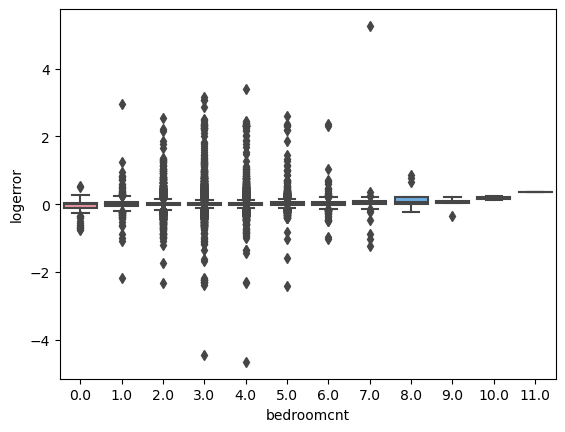

In [21]:
#visualize
sns.boxplot(data = train, 
           x = 'bedroomcnt',
           y = 'logerror')
plt.show()

In [22]:
# is there equal variance? 
alpha =0.05
stat, p = stats.levene(bedroom.logerror, no_bedroom.logerror)
if p < alpha :
    print('equal variances, proceed')
else:
    print('unequal variances')

equal variances, proceed


In [23]:
#performing ttest
alpha = 0.05
t, p = stats.ttest_ind(bedroom.logerror, no_bedroom.logerror)
stat, p


(26.18383994964165, 0.0001060939222010843)

In [24]:
if p < alpha: 
    print('reject Null')
else:
    print('fail to reject Null')

reject Null


This is show that there are no correlation between logerror and bedroom

## How Does Logerror Correlate with censustractandblock?


In [27]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(df['censustractandblock'], df['logerror'])

# Print the correlation coefficient and p-value
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")



Pearson Correlation Coefficient: 0.005105727161529627
P-value: 0.2434207906231996
The correlation is not statistically significant.


## Is there a Trend in Logerror?


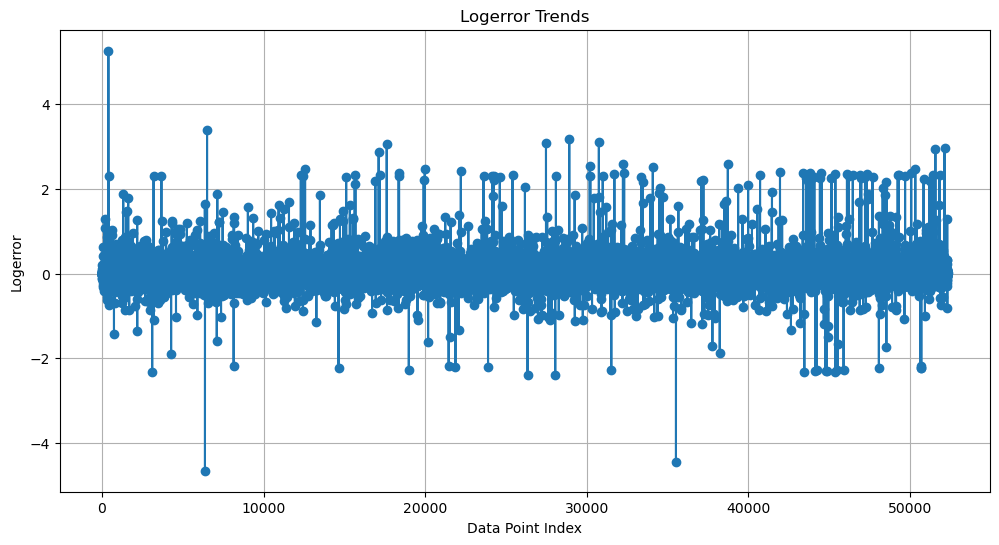

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['logerror'], marker='o', linestyle='-')
plt.title('Logerror Trends')
plt.xlabel('Data Point Index')
plt.ylabel('Logerror')
plt.grid(True)
plt.show()


In [31]:
import statsmodels.api as sm

# Assuming 'df' is your DataFrame
X = df.reset_index().index  # Use the index as the independent variable
y = df['logerror']

# Add a constant to the independent variable (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression analysis
summary = model.summary()

# Extract the p-value for the coefficient of the index (position)
p_value = model.pvalues['const']  # This is the p-value for the position coefficient

# Print the summary and p-value
print(summary)
print(f"P-value for the position coefficient: {p_value}")


                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5633
Date:                Tue, 26 Sep 2023   Prob (F-statistic):              0.453
Time:                        08:54:11   Log-Likelihood:                 16638.
No. Observations:               52198   AIC:                        -3.327e+04
Df Residuals:                   52196   BIC:                        -3.325e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0171      0.002     11.075      0.0

## What is the relationship between logerror and bedroomcnt?


I will perform regression analysis to assess how bedroomcn tinfluence logerror. Using OLS i can estiamte the impact of bedroomcnt on logerror

In [36]:


# Assuming 'df' contains all relevant variables
X = df[['bedroomcnt']]
X = sm.add_constant(X)  # Add a constant term (intercept)
y = df['logerror']

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Get regression summary
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     77.75
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           1.20e-18
Time:                        08:59:59   Log-Likelihood:                 16676.
No. Observations:               52198   AIC:                        -3.335e+04
Df Residuals:                   52196   BIC:                        -3.333e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0056      0.003     -2.012      0.044      -0.011      -0.000
bedroomcnt     0.0072      0.001      8.818      0.000       0.006       0.009
==============================================================================
Omnibus:                    49654.827   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26902475.227
Skew:                           3.758   Prob(JB):                         0.00
Kurtosis:                     113.964   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p value is below 0.05 therefore there is a significant relationship here

## What is the relationship between logerror and bathroomcnt?


In [37]:

# Assuming 'df' contains all relevant variables
X = df[['bathroomcnt']]
X = sm.add_constant(X)  # Add a constant term (intercept)
y = df['logerror']

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Get regression summary
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     67.41
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           2.26e-16
Time:                        09:59:45   Log-Likelihood:                 16671.
No. Observations:               52198   AIC:                        -3.334e+04
Df Residuals:                   52196   BIC:                        -3.332e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0038      0.002      2.021      0.043       0.000       0.008
bathroomcnt     0.0062      0.001      8.210      0.000       0.005       0.008
==============================================================================
Omnibus:                    49576.034   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26765756.728
Skew:                           3.748   Prob(JB):                         0.00
Kurtosis:                     113.681   Cond. No.                         7.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p value is below 0.05 therefore there is a significant relationship here

In [41]:
wrangle_zillow.missing_by_col(df)

bedroomcnt             0
bathroomcnt            0
censustractandblock    0
taxvaluedollarcnt      1
assessmentyear         0
logerror               0
dtype: int64

In [43]:
df.dropna(inplace=True)

In [44]:
col=df.columns
wrangle_zillow.get_fences(df, col)

(bedroomcnt             1.500000e+00
 bathroomcnt            5.000000e-01
 censustractandblock    6.004940e+13
 taxvaluedollarcnt     -4.437675e+05
 assessmentyear         2.016000e+03
 logerror              -1.225784e-01
 dtype: float64,
 bedroomcnt             5.500000e+00
 bathroomcnt            4.500000e+00
 censustractandblock    6.091504e+13
 taxvaluedollarcnt      1.256564e+06
 assessmentyear         2.016000e+03
 logerror               1.384692e-01
 dtype: float64)

In [45]:
wrangle_zillow.report_outliers(df, k=1.5)

Outliers for Col bathroomcnt:
lower:  0.5 upper:  4.5
31       5.0
33       5.0
45       6.5
52       5.0
108      6.0
        ... 
52192    6.0
52207    5.0
52238    6.0
52273    5.0
52307    0.0
Name: bathroomcnt, Length: 1674, dtype: float64
----------
Outliers for Col censustractandblock:
lower:  60049395188521.0 upper:  60915040104489.0
1        6.111001e+13
9        6.111005e+13
87       6.111006e+13
90       6.111006e+13
92       6.111005e+13
             ...     
51760    6.111008e+13
51763    6.111008e+13
51764    6.111003e+13
51769    6.111004e+13
52316    6.111008e+13
Name: censustractandblock, Length: 4367, dtype: float64
----------
Outliers for Col taxvaluedollarcnt:
lower:  -443767.5 upper:  1256564.5
16       2040000.0
22       1444248.0
23       1473080.0
31       1814004.0
33       1279000.0
           ...    
52236    2000000.0
52238    2300797.0
52241    1582000.0
52263    2082201.0
52283    1629476.0
Name: taxvaluedollarcnt, Length: 3520, dtype: float64
----------
O

In [46]:
train, val_test = train_test_split(df, train_size = 0.7,
                                  random_state = 42,
                                  stratify = None)
val, test = train_test_split(val_test, train_size =0.5,
                            random_state = 42,
                            stratify = None)

In [47]:
train.shape

(36537, 6)

In [48]:
train

,bedroomcnt,bathroomcnt,censustractandblock,taxvaluedollarcnt,assessmentyear,logerror
22079,5.0,3.0,6.037911e+13,210083.0,2016.0,0.014366
23478,3.0,1.0,6.037572e+13,186636.0,2016.0,0.042888
29334,3.0,2.0,6.037500e+13,160670.0,2016.0,-0.015678
38462,3.0,1.0,6.059088e+13,297254.0,2016.0,0.072706
51977,2.0,2.0,6.037301e+13,456395.0,2016.0,-0.029744
...,...,...,...,...,...,...
11304,4.0,3.0,6.037401e+13,535986.0,2016.0,0.133678
44840,4.0,4.5,6.111006e+13,1584361.0,2016.0,-0.037401
38245,4.0,2.0,6.059042e+13,947228.0,2016.0,-0.001934
860,3.0,2.0,6.037401e+13,313004.0,2016.0,0.053889


In [49]:
print("train observations: ", train.size)
print("validate observations: ", val.size)
print("test observations: ", test.size)


train observations:  219222
validate observations:  46980
test observations:  46980
